In [2]:
library(tidyverse)
ggplot2::theme_set(theme_bw())
setwd("C:/Users/이찬솔/Documents/ADP/problem/problem4")

In [3]:
library(showtext)
font_add_google(name = "Black Han Sans", family = "blackhansans")
showtext_auto()

Loading required package: sysfonts

Loading required package: showtextdb



# 1번
철강데이터 종속변수 : target     
데이터 출처 : https://www.kaggle.com/uciml/faulty-steel-plates    
데이터 경로 : /kaggle/input/adp-kr-p4/problem1.csv


In [4]:
data1 <- read.csv("problem1.csv")
data1 %>% dim
# data1 %>% glimpse
# colSums(is.na(data1))

[1] 1941   28

### 1-1  EDA(탐색적 데이터 분석)을 하시오
(시각화와 통계량을 제시할 것)

In [5]:
# summary(data1)
# cor(data1)
# library(PerformanceAnalytics)
# data1 %>% chart.Correlation(histogram = , pch = "+")

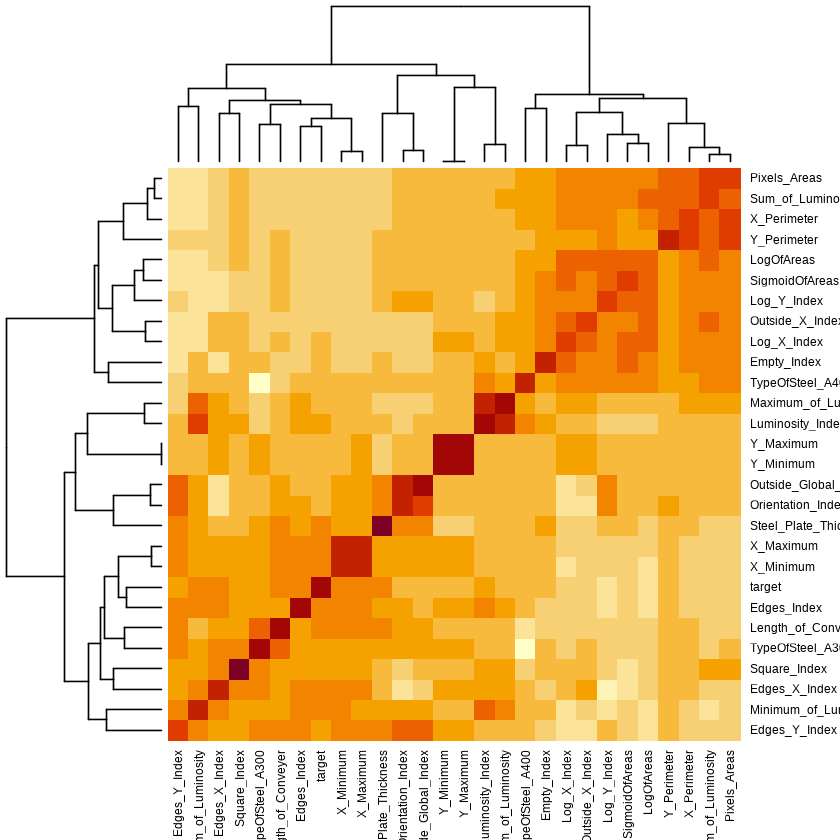

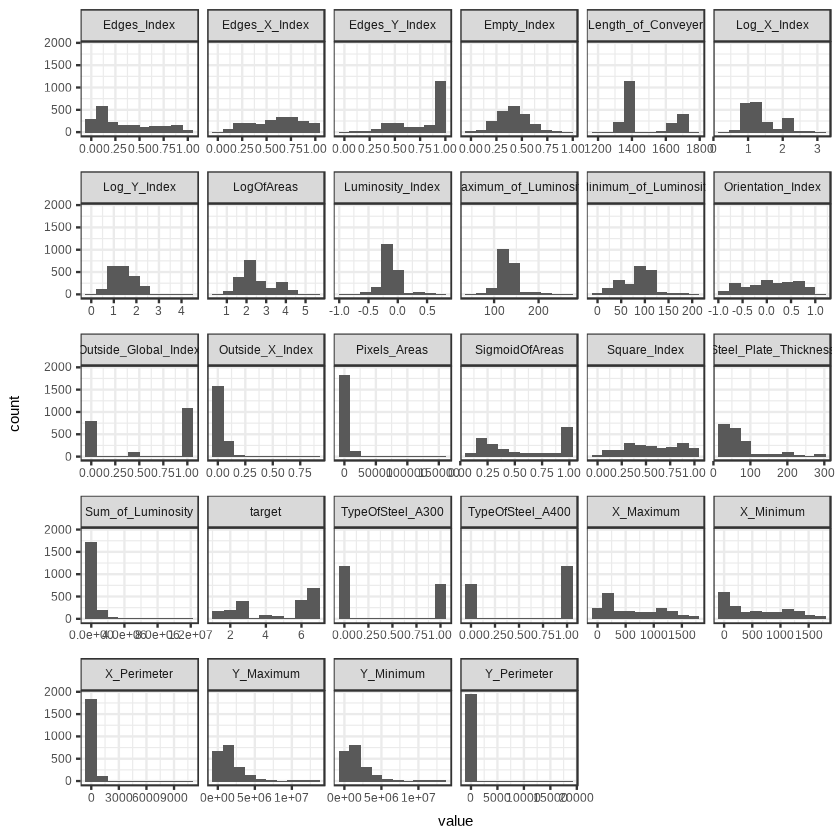

In [6]:
cor(data1) %>% heatmap()
ggplot(gather(data1), aes(value)) + geom_histogram(bins = 10) + facet_wrap(~key, scales = 'free_x')

### 1-2 변수 선택(VIF), 파생변수 생성, 데이터 분할(train/test(20%))
(시각화와 통계량을 제시할 것)

- TypeOfSteel_A300과 TypeOfSteel_A400은, TypeOfSteel이 더미 인코딩된 변수임을 확인

In [8]:
factors <- c("TypeOfSteel_A400", "TypeOfSteel_A300")
data1 %>% select(factors) %>% head

,TypeOfSteel_A400,TypeOfSteel_A300
,<int>,<int>
1,0,1
2,0,1
3,0,1
4,1,0
5,1,0
6,1,0


In [9]:
m <- lm(target ~ ., data1)
m$coefficients 

(Intercept)             X_Minimum             X_Maximum 
        -4.786401e+00          5.114167e-03         -4.535788e-03 
            Y_Minimum             Y_Maximum          Pixels_Areas 
         2.969638e-03         -2.969599e-03         -4.174436e-04 
          X_Perimeter           Y_Perimeter     Sum_of_Luminosity 
        -4.736829e-03          7.010265e-03          3.624353e-06 
Minimum_of_Luminosity Maximum_of_Luminosity    Length_of_Conveyer 
         2.368850e-02          1.074933e-02          1.790594e-03 
     TypeOfSteel_A300      TypeOfSteel_A400 Steel_Plate_Thickness 
        -4.245969e-01                    NA          7.746839e-03 
          Edges_Index           Empty_Index          Square_Index 
         9.952978e-01          9.669395e-01          6.833989e-01 
      Outside_X_Index         Edges_X_Index         Edges_Y_Index 
         4.940020e+00          2.656562e-01          7.373761e-03 
 Outside_Global_Index            LogOfAreas           Log_X_Index 
        -8.830671e-02         -5.691689e-02          3.128623e+00 
          Log_Y_Index     Orientation_Index      Luminosity_Index 
        -2.048541e+00          1.261833e+00         -4.507232e+00 
       SigmoidOfAreas 
        -2.070120e-01

- 다중공선성 VIF탐색을 위한 선형회귀모형에서 TypeOfSteel_A400의 회귀계수는 결측값으로 표시
- 따라서 해당 변수를 제거하고 모형 생성

In [11]:
library(car)

In [12]:
data2 <- data1 %>% select(-TypeOfSteel_A400)
m2 <- lm(target ~ ., data2)
vifs <- vif(m2) # diag(solve(cor(data2))) 
vifs %>% sort()

Steel_Plate_Thickness           Edges_Index      TypeOfSteel_A300 
         1.266577e+00          1.321925e+00          1.620167e+00 
         Square_Index    Length_of_Conveyer         Edges_X_Index 
         1.838381e+00          1.931461e+00          5.708240e+00 
 Outside_Global_Index Maximum_of_Luminosity Minimum_of_Luminosity 
         5.831323e+00          6.036402e+00          8.324323e+00 
        Edges_Y_Index        SigmoidOfAreas      Luminosity_Index 
         9.438620e+00          9.611151e+00          1.293111e+01 
          Empty_Index     Orientation_Index           X_Perimeter 
         2.645508e+01          3.826412e+01          1.687822e+02 
    Sum_of_Luminosity           Log_Y_Index          Pixels_Areas 
         3.661924e+02          4.055794e+02          4.907086e+02 
          Log_X_Index       Outside_X_Index            LogOfAreas 
         4.911691e+02          1.000563e+03          1.185824e+03 
          Y_Perimeter             X_Maximum             X_Minimum 
         1.559205e+03          3.841376e+04          4.207250e+04 
            Y_Minimum             Y_Maximum 
         1.703248e+10          1.703270e+10

In [13]:
cors <- cor(data2 %>% select(-target))
vifs <- cor(data2 %>% select(-target)) %>% solve %>% diag %>% sort
eigenval <- eigen(cors)$values # 고유벡터 / 고유값
sqrt(max(eigenval) / eigenval) # 조건지수
# 조건지수가 30이상이면 다중공선성을 해결하기 위한 분석 필요 
# 30이상의 조건지수 5개 => 변수간 선형종속관계가 5개

[1] 1.000000e+00 1.547098e+00 1.822429e+00 1.917664e+00 2.086796e+00
 [6] 2.282689e+00 2.749169e+00 2.876570e+00 2.977136e+00 3.289607e+00
[11] 3.461001e+00 4.102688e+00 4.598976e+00 5.263755e+00 5.844664e+00
[16] 6.582708e+00 9.054638e+00 1.173667e+01 1.212875e+01 1.350530e+01
[21] 2.613219e+01 3.414229e+01 7.737526e+01 1.288967e+02 8.065563e+02
[26] 5.274544e+05

In [14]:
(vif_names <- which(sort(vifs) > 10) %>% names)
(vifs > 10) %>% table

[1] "Luminosity_Index"  "Empty_Index"       "Orientation_Index"
 [4] "X_Perimeter"       "Sum_of_Luminosity" "Log_Y_Index"      
 [7] "Pixels_Areas"      "Log_X_Index"       "Outside_X_Index"  
[10] "LogOfAreas"        "Y_Perimeter"       "X_Maximum"        
[13] "X_Minimum"         "Y_Minimum"         "Y_Maximum"

.
FALSE  TRUE 
   11    15 

- VIF값 10이상을 가지는 변수들을 다중공선성이 해결될때 까지 순차적으로 제거
- or 모두 제거

In [15]:
m4 <- lm(target ~ . - Y_Maximum - X_Maximum - LogOfAreas - Pixels_Areas - X_Perimeter - Log_X_Index - Log_Y_Index - Orientation_Index - Sum_of_Luminosity, 
         data2)
regbook::vif(m4)$VIF %>% sort

Y_Minimum           Y_Perimeter          Square_Index 
             1.091261              1.154742              1.242788 
Steel_Plate_Thickness           Edges_Index             X_Minimum 
             1.248456              1.290042              1.373108 
   Length_of_Conveyer      TypeOfSteel_A300           Empty_Index 
             1.405990              1.536813              1.949806 
 Outside_Global_Index         Edges_X_Index       Outside_X_Index 
             2.178846              2.518556              2.668992 
       SigmoidOfAreas         Edges_Y_Index Minimum_of_Luminosity 
             3.208792              3.302017              4.658936 
Maximum_of_Luminosity      Luminosity_Index 
             5.588433              9.692879

In [16]:
data3 <- data2 %>%
    select(-c("Y_Maximum", "X_Maximum", "LogOfAreas", "Pixels_Areas", "X_Perimeter", 
              "Log_X_Index", "Log_Y_Index", "Orientation_Index", "Sum_of_Luminosity")) %>%
    mutate(target = factor(target))

In [17]:
table(data3$target) / nrow(data3)


         1          2          3          4          5          6          7 
0.08140134 0.09788769 0.20144256 0.03709428 0.02833591 0.20710974 0.34672849 

- target의 범주비율을 고려하여 층화추출을 통해 train/test 분할

In [18]:
library(rsample)

In [19]:
set.seed(1234)
split <- initial_split(data3, strata = target, prop = 0.8)
train <- training(split)
test <- testing(split)

### 1-3 종속변수들중 "1"인지 아닌지 판단하려한다. 종속변수를 1과 1이 아닌 값(이항)으로 치환하고 로지스틱 회귀 분석을 실시하라.
confusionMatrix를 확인하고 최적의 cut off value 정하여라.

In [36]:
train$target2 <- ifelse(train$target != 1, 0, 1) %>% as.factor()
test$target2 <- ifelse(test$target != 1, 0, 1) %>% as.factor()

In [37]:
glm1 <- glm(target2 ~ . - target, family = "binomial", train)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [38]:
# glm1 %>% summary
qchisq(0.95, df = 1534) # 모형의 이탈도 => 모형 적합도 좋음

[1] 1626.23

In [39]:
library(caret)

In [40]:
pred1 <- predict(glm1, test, "response") %>% round %>% as.factor

In [41]:
# confusionMatrix(pred1, test$target2)
mean(pred1 == test$target2)

[1] 0.9305913

In [42]:
library(ROCR)

In [30]:
pred11 <- predict(glm1, test, "response") 

In [58]:
predict <- prediction(pred11, test$target2)
perf <- performance(predict, "tpr", "fpr")

In [57]:
cost <- performance(predict, "cost")

In [72]:
(cut <- predict@cutoffs[[1]][which.min(cost@y.values[[1]])])

112 
0.2840045

In [79]:
table(pred11 > cut, test$target2)
((344 + 22)/ (344 + 12 + 11 + 22))

       
          0   1
  FALSE 344  12
  TRUE   11  22

[1] 0.940874

In [86]:
test$target[pred11 > cut] %>% table
test$target[pred11 < cut] %>% table

.
 1  2  3  4  5  6  7 
22  1  1  0  1  0  8 

.
  1   2   3   4   5   6   7 
 11  44  78  17   7  70 128 

### 1-4 종속변수(y)를 다항(7 class)인 상태에서 SVM을 포함하여 3가지 알고리즘으로 평가하라.
각 모델에서 confusionMatrix를 확인하고 최적의 cut off value 를 정하여라.

- 표준화

In [27]:
library(recipes)

In [28]:
set.seed(1234)
split <- initial_split(data3, strata = target, prop = 0.8)
train <- training(split)
test <- testing(split)

In [29]:
train2 <- recipe(~ ., data = train %>% select(-target)) %>%
    step_center(all_numeric()) %>%
    step_scale(all_numeric()) %>%
    prep(training = train %>% select(-target), retain = TRUE) %>%
    juice() %>%
    mutate(target = train$target)

test2 <- recipe(~ ., data = test %>% select(-target)) %>%
    step_center(all_numeric()) %>%
    step_scale(all_numeric()) %>%
    prep(test = train %>% select(-target), retain = TRUE) %>%
    juice() %>%
    mutate(target = test$target)

- SVM

In [31]:
library(e1071)

In [32]:
# C <- c(0.01, 0.1, 0.5, 1, 10, 100) ; G <- c(0.5, 1, 2, 3, 4, 5)
# set.seed(1234)
# tune.out1 <- tune(svm, target ~ ., data = train2, ranges = list(cost = C, gamma = G))

In [ ]:
svm <- svm(target ~ ., train2,
            type = "C-classification")
pred1 <- predict(svm, test2)
confusionMatrix(pred1, test2$target, mode = "everything")

In [34]:
mean(pred1 == test2$target)

[1] 0.7634961

In [237]:
library(MLmetrics)

In [246]:
acc <- c() ; auc <- c() ; f1 <- c()
for (i in 1:6) {
    pr <- ifelse(as.numeric(pred1) <= i, 1, 0) 
    tr <- ifelse(as.numeric(test2$target) <= i, 1, 0)
    acc[i] <- Accuracy(y_true = tr, y_pred = pr)
    auc[i] <- AUC(y_true = tr, y_pred = pr)
    f1[i] <- F1_Score(y_true = tr, y_pred = pr)
}
which.max(acc) ; which.max(auc) ; which.max(f1)

[1] 1

[1] 4

[1] 1

- 랜덤포레스트

In [35]:
library(ranger)

In [36]:
n_features <- ncol(train2) - 1

In [37]:
hyper_grid <- expand.grid(
    num.trees = c(500, 1000, 1500),
    mtry = floor(n_features * c(0.15, 0.2, 0.25, 0.333, 0.4)),
    min.node.size = c(1, 3, 5, 10),
    error = NA
)

In [38]:
for (i in seq_len(nrow(hyper_grid))) {
    fit <- ranger(
        target ~ .,
        data = train2,
        num.trees = hyper_grid$num.trees[i],
        mtry = hyper_grid$mtry[i],
        min.node.size = hyper_grid$min.node.size[i],
        verbose = FALSE,
        seed = 1234
    )
    hyper_grid$error[i] <- fit$prediction.error
}

In [39]:
hyper_grid %>% arrange(error) %>% head(1)

,num.trees,mtry,min.node.size,error
,<dbl>,<dbl>,<dbl>,<dbl>
1,1500,5,3,0.2042526


In [53]:
rf <- ranger(
    target ~ ., data = train2,
    num.trees = 1500, mtry = 5, min.node.size = 3
)

In [ ]:
pred3 <- predict(rf, test2)
confusionMatrix(pred3$predictions, test2$target, mode = "everything")

In [42]:
mean(pred3$predictions == test2$target)

[1] 0.6966581

In [247]:
acc <- c() ; auc <- c() ; f1 <- c()
for (i in 1:6) {
    pr <- ifelse(as.numeric(pred3$predictions) <= i, 1, 0) 
    tr <- ifelse(as.numeric(test2$target) <= i, 1, 0)
    acc[i] <- Accuracy(y_true = tr, y_pred = pr)
    auc[i] <- AUC(y_true = tr, y_pred = pr)
    f1[i] <- F1_Score(y_true = tr, y_pred = pr)
}
which.max(acc) ; which.max(auc) ; which.max(f1)

[1] 1

[1] 4

[1] 1

- 다항 로지스틱 회귀분석

In [44]:
library(nnet)

In [ ]:
multi <- multinom(target ~ ., train2)
pred4 <- predict(multi, test2)

In [46]:
mean(pred4 == test2$target)

[1] 0.6015424

In [249]:
acc <- c() ; auc <- c() ; f1 <- c()
for (i in 1:6) {
    pr <- ifelse(as.numeric(pred4) <= i, 1, 0) 
    tr <- ifelse(as.numeric(test2$target) <= i, 1, 0)
    acc[i] <- Accuracy(y_true = tr, y_pred = pr)
    auc[i] <- AUC(y_true = tr, y_pred = pr)
    f1[i] <- F1_Score(y_true = tr, y_pred = pr)
}
which.max(acc) ; which.max(auc) ; which.max(f1)

[1] 1

[1] 3

[1] 1

- XGB

In [48]:
library(xgboost)

In [49]:
(classes <- n_distinct(train2$target))

[1] 7

In [315]:
train_y <- as.numeric(train2$target) -1 
train_x <- as.matrix(train2 %>% select(-target))
dtrain <- xgb.DMatrix(train_x, label = train_y)

test_y <- as.numeric(test2$target) -1 
test_x <- as.matrix(test2 %>% select(-target))
dtest <- xgb.DMatrix(test_x, label = test_y)

In [316]:
params <- list(booster = "gbtree",
               objective = "multi:softprob",
               eval_metric = "mlogloss",
               num_class = classes)

xgb <- xgboost(
    params = params,
    dtrain,
    nrounds = 1000,
    early_stopping_rounds = 100,
    verbose = FALSE
)

In [317]:
pred5 <- predict(xgb, dtest)
pred5 <- max.col(matrix(pred5, ncol = 7, byrow = T) %>% as.data.frame()) %>% as.factor
mean(pred5 == test2$target)

[1] 0.781491

In [296]:
confusionMatrix(pred5, test2$target)

In [318]:
acc <- c() ; auc <- c() ; f1 <- c()
for (i in 1:6) {
    pr <- ifelse(as.numeric(pred5) <= i, 1, 0) 
    tr <- ifelse(as.numeric(test2$target) <= i, 1, 0)
    acc[i] <- Accuracy(y_true = tr, y_pred = pr)
    auc[i] <- AUC(y_true = tr, y_pred = pr)
    f1[i] <- F1_Score(y_true = tr, y_pred = pr)
}
which.max(acc) ; which.max(auc) ; which.max(f1)

[1] 1

[1] 4

[1] 1

- 모든 분류 알고리즘이 종속변수 target의 cut point value를 1로하여, 1과 1이 아닌 나머지로 구분 하였을때 가장 높은 정확도와, F1-Score값을 가진다 => 따라서 최적의 cut point value는 1

### 1-5 종속변수를 제외한 나머지 데이터를 바탕으로 군집분석을 실시하고 최적의 군집수와 군집 레이블을 구하여라. 군집레이블을 추가한 데이터를 1-4에서 만든 모델중 가장 성능이 좋았던 하나의 모델에 다시 학습하여 F1-score를 비교하라 

In [254]:
library(factoextra)

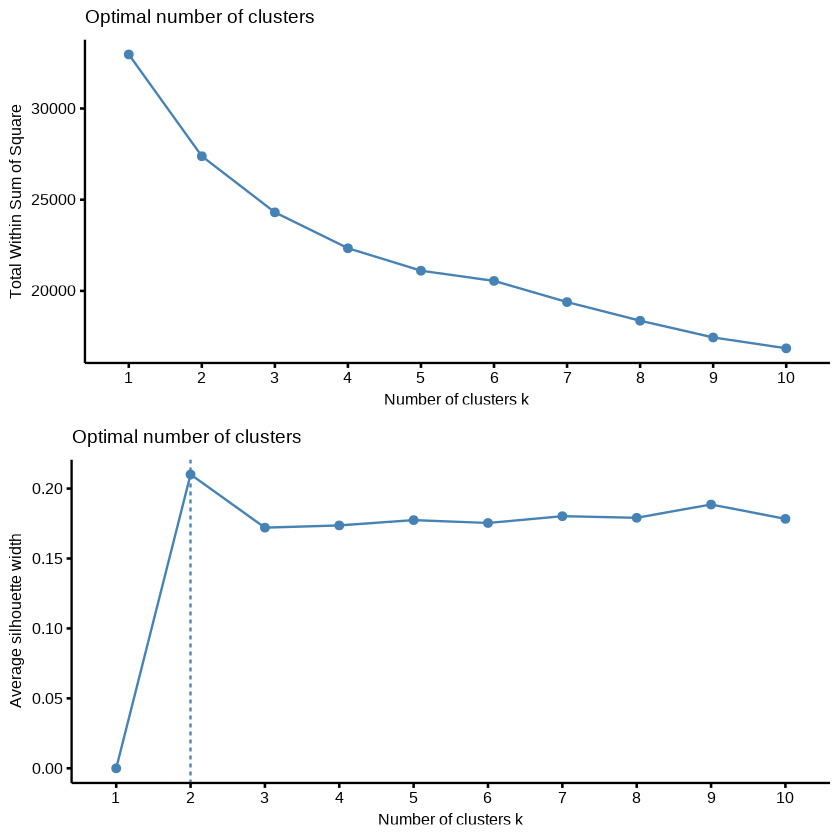

In [271]:
p1 <- fviz_nbclust(train2 %>% rbind(test2) %>% select(-target), 
             FUN = kmeans, k.max = 10, method = "wss")
p2 <- fviz_nbclust(train2 %>% rbind(test2) %>% select(-target), 
             FUN = kmeans, k.max = 10, method = "silhouette")

gridExtra::grid.arrange(p1, p2)

- 비계층적 군집분석에 최적의 군집수 2로 선정

In [272]:
k <- kmeans(train2 %>% rbind(test2), 2)

In [319]:
traink <- train2 %>%
    mutate(cluster = k$cluster[1:nrow(train2)])
testk <- test2 %>%
    mutate(cluster = k$cluster[(nrow(train2) + 1):(nrow(train2 %>% rbind(test2)))])

In [320]:
train_y <- as.numeric(traink$target) -1 
train_x <- as.matrix(traink %>% select(-target))
dtrain <- xgb.DMatrix(train_x, label = train_y)

test_y <- as.numeric(testk$target) -1 
test_x <- as.matrix(testk %>% select(-target))
dtest <- xgb.DMatrix(test_x, label = test_y)

In [321]:
params <- list(booster = "gbtree",
               objective = "multi:softprob",
               eval_metric = "mlogloss",
               num_class = classes)

xgb_k <- xgboost(
    params = params,
    dtrain,
    nrounds = 1000,
    early_stopping_rounds = 100,
    verbose = FALSE
)

In [322]:
pred <- predict(xgb_k, dtest)
pred <- max.col(matrix(pred, ncol = 7, byrow = T) %>% as.data.frame()) %>% as.factor
mean(pred == testk$target)

[1] 0.8097686

In [328]:
data.frame(confusionMatrix(pred, testk$target, mode = "everything")$byClass) %>% select(F1) %>% t()

,Class: 1,Class: 2,Class: 3,Class: 4,Class: 5,Class: 6,Class: 7
F1,0.8,0.7671233,0.9493671,0.9444444,0.6666667,0.6714286,0.804428


In [329]:
data.frame(confusionMatrix(pred5, test2$target, mode = "everything")$byClass ) %>% select(F1) %>% t()

,Class: 1,Class: 2,Class: 3,Class: 4,Class: 5,Class: 6,Class: 7
F1,0.6410256,0.7532468,0.9681529,0.9714286,0.6666667,0.6891892,0.7537313


- 정확도와 F1스코어 모두 군집 레이블 추가 전보다 상승하였다.

# 2번 전력데이터
데이터 출처 : 직접제작     
데이터 설명 : 2050년 1년동안의 5유형(A,B,C,D,E)의 전력사용량을 나타낸다. 각유형의 전력사용량은 1분마다 갱신되며 그 값은 누적된다.       
6시간이 지나면(00:00, 06:00, 12:00, 18:00시에) 전력사용량은 0으로 초기화 된다.

- /kaggle/input/adp-kr-p4/problem2_usage.csv   
6시간 간격의 총 전력사용량의 데이터이다. timestamp순서는 섞여있다.      
6시간 간격의 특정 시간대(마지막시각 '05:59','11:59','17:59','23:59')의 전력 총합을 나타낸다.     
데이터의 총합을 구해서 비교할때 부동소수점 오류가 날수 있다. 파이썬의 경우 round(4)를 취하여 해결한다.    

In [338]:
usage <- read.csv("problem2_usage.csv")

- /kaggle/input/adp-kr-p4/problem2_usage_history.csv   
1분간격의 A,B,C,D,E 유형의 소비 누적 전력을 나타낸다. 같은 6시간간격의 시간대의 데이터는 같은 "6hour_index"값을 가진다.    
00:00, 06:00, 12:00, 18:00시에는 5유형의 전력은 초기화 된다.     
데이터의 총합을 구해서 비교할때 부동소수점 오류가 날수 있다. 파이썬의 경우 round(4)를 취하여 해결한다. 

In [458]:
history <- read.csv("problem2_usage_history.csv")

- /kaggle/input/adp-kr-p4/problem2_avg_tem.csv    
2050년 1년동안 일자별 평균 온도를 나타낸다

In [337]:
avg_tem <- read.csv("problem2_avg_tem.csv")

### 2-1 usage의 총사용량을 아래와 같은 모양으로 연월별 총합으로 계산하여 CSV 파일로 작성하시오.    
- 일자별 총사용량은 누적사용량이 갱신되기 직전의 최대값들의 합으로 계산한다     
- ['05:59','11:59','17:59','23:59'] 시간대의 A,B,C,D,E의 컬럼별 총합이 각 유형의 일일 사용량이다     

![image](https://github.com/Datamanim/datarepo/blob/main/adp/p4/p2.png?raw=true)

In [388]:
library(lubridate)

In [456]:
avg_tem$date %>% as.character %>% head

[1] "2050-01-01" "2050-01-02" "2050-01-03" "2050-01-04" "2050-01-05"
[6] "2050-01-06"

In [462]:
days <- c()
for (i in 1:365) {
    ind <- rep(as.character(avg_tem$date)[i], 60*24)
    days <- append(days, ind)
}

In [501]:
history1 <- history %>%
    mutate(date = as_date(days)) %>%
    mutate(mon = month(date))

In [504]:
history2 <- history1 %>% group_by(mon, X6hour_index) %>%
    summarise(Am = max(A), Bm = max(B), Cm = max(C), Dm = max(D), Em = max(E)) %>% 
    group_by(mon) %>%
    summarise(A = sum(Am), B = sum(Bm), C = sum(Cm), D = sum(Dm), E = sum(Em)) %>%
    mutate(date = c("2050-01", "2050-02", "2050-03", "2050-04", "2050-05", "2050-06",
                    "2050-07", "2050-08", "2050-09", "2050-10", "2050-11", "2050-12")) %>%
    select(date, A, B, C, D, E) 

`summarise()` has grouped output by 'mon'. You can override using the `.groups` argument.


In [508]:
history2 %>% head
write.csv(history2, "02-01.csv")

date,A,B,C,D,E
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2050-01,25437.72,29524.69,26325.67,26787.35,24378.57
2050-02,22587.09,27962.43,21188.79,23261.37,24636.35
2050-03,28677.47,23861.86,23680.98,26945.83,27807.92
2050-04,24420.22,27322.67,26299.62,27226.89,24303.18
2050-05,27028.22,25173.20,30392.37,28374.17,26624.20
2050-06,23862.72,25125.05,26334.09,23571.05,32754.09


### 2-2 가로축을 요일(일~월) 세로축을 평균 전력사용량으로 하는 그래프를 그려라. 각 유형별로 색을 다르게 표현하여 5개의 line plot을 그리며 범례를 표시하라

In [590]:
usage$date <- as.POSIXlt(usage$timestamp, origin = "1970-01-01") 

In [628]:
(history4 <- history1 %>% 
    mutate(wday = wday(date, label = T, week_start = "1")) %>% 
    group_by(wday) %>% 
    summarise(A = mean(A), B = mean(B), C = mean(C), D = mean(D), E = mean(E)) )

wday,A,B,C,D,E
<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
월,84.42667,96.85428,87.79261,96.73455,86.99457
화,99.08938,96.88029,89.54031,90.42027,90.38698
수,95.24100,87.89843,87.44258,88.56055,87.57305
목,95.48221,86.58026,80.54825,88.41060,98.46164
금,97.24834,95.51343,85.95737,91.15593,86.17062
토,152.90120,163.87292,148.71284,146.50263,142.56341
일,128.46204,156.93584,155.54835,156.10045,156.46589


In [638]:
history5 <- gather(history4, key = wday) %>% 
    mutate(d = rep(history4$wday, 5))

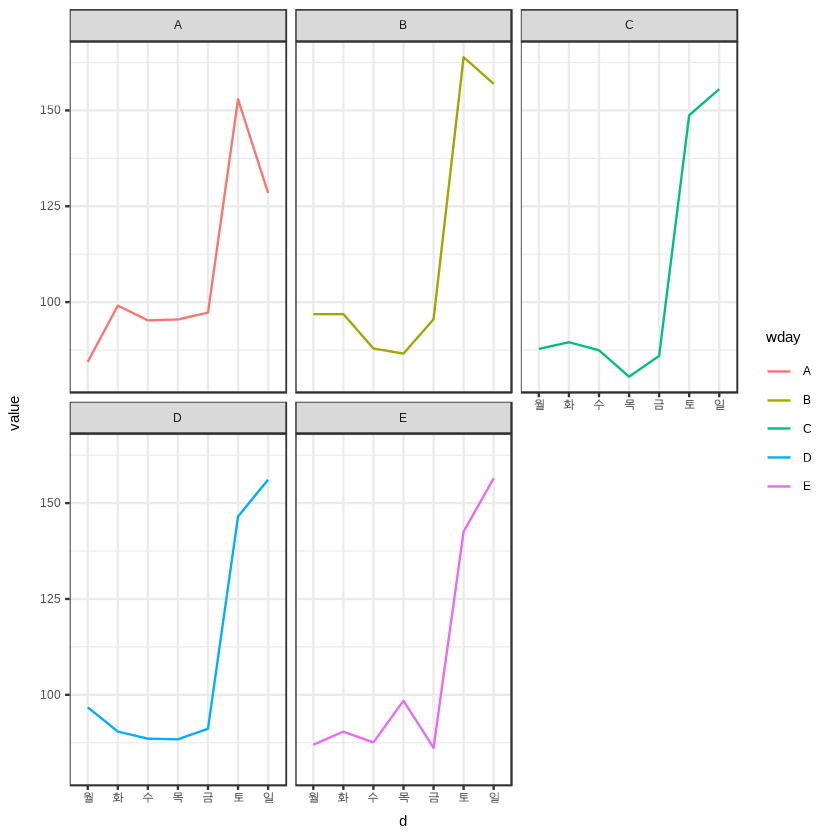

In [615]:
history5 %>% group_by(wday, d) %>%
    ggplot(aes(d, value, group = wday, colour = wday)) + geom_line() + facet_wrap(~wday)

### 2-3 요일별 각 유형의 평균 전력 사용량 간에 연관성이 있는지 검정하라

In [645]:
aov(value ~ wday + d, history5) %>% summary

            Df Sum Sq Mean Sq F value   Pr(>F)    
wday         4    186      46   0.878    0.492    
d            6  25719    4287  81.021 9.79e-15 ***
Residuals   24   1270      53                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [644]:
aov(value ~ d, history5) %>% summary

            Df Sum Sq Mean Sq F value Pr(>F)    
d            6  25719    4287   82.46 <2e-16 ***
Residuals   28   1456      52                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

- 귀무가설 : 요일별 각 유형의 평균 전력에 차이가 없다
- P-value < 0.05 => 귀무가설 기각 => 요일별 각 유형의 평균 전력에 차이가 있다.

### 2-4 일자(매일)마다 각 유형의 전력사용량의 합을 데이터프레임으로 구하고 일자 데이터에서의 유형별 온도와의 상관계수를 각각 구하여라

In [675]:
df <- history1 %>% 
    group_by(X6hour_index, date) %>% 
    summarise(Amax = max(A), Bmax = max(B), Cmax = max(C), Dmax = max(D), Emax = max(E)) %>% 
    arrange(date) %>% 
    group_by(date) %>% 
    summarise(A = sum(Amax), B = sum(Bmax), C = sum(Cmax), D = sum(Dmax), E = sum(Emax)) 
write.csv(df, "02-04.csv")

`summarise()` has grouped output by 'X6hour_index'. You can override using the `.groups` argument.


In [683]:
df1 <- df %>% mutate(temperature = avg_tem$temperature) %>% head ; df1 %>% head

date,A,B,C,D,E,temperature
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2050-01-01,1583.1230,1748.4258,719.0734,1512.2236,304.6623,6.1644078
2050-01-02,1084.4828,2167.1320,1227.6223,484.2982,1095.9014,1.0155104
2050-01-03,152.3612,394.0491,321.2149,982.0407,498.5167,3.6912517
2050-01-04,1225.0208,769.0568,655.4110,791.3395,834.6589,4.0715155
2050-01-05,836.8017,552.5661,1216.6259,1042.4509,666.6004,0.6092487
2050-01-06,549.0302,551.1219,322.6233,536.4084,1535.2180,2.3313987


In [694]:
cor(df1 %>% select(-date))

,A,B,C,D,E,temperature
A,1.0000000,0.68536385,0.46329761,0.37756593,-0.26425352,0.37986783
B,0.6853639,1.00000000,0.53325637,0.03524611,-0.07637212,0.09839084
C,0.4632976,0.53325637,1.00000000,-0.02712205,-0.10357284,-0.53794441
D,0.3775659,0.03524611,-0.02712205,1.00000000,-0.88182999,0.65905027
E,-0.2642535,-0.07637212,-0.10357284,-0.88182999,1.00000000,-0.54068610
temperature,0.3798678,0.09839084,-0.53794441,0.65905027,-0.54068610,1.00000000


In [693]:
cor(df1 %>% select(-date))[1:5,6] %>% print

          A           B           C           D           E 
 0.37986783  0.09839084 -0.53794441  0.65905027 -0.54068610 
